## Злокачественная меланома 
- это новообразование из пигментных клеток (меланоцитов), которое чаще всего встречается в коже, но может также возникать в глазах, ушах, желудочно-кишечном тракте, а также на слизистых оболочках полости рта и гениталий. Обычно клетки кожи развиваются контролируемым и упорядоченным образом, но когда в некоторых клетках появляются мутации в генах, новые клетки могут начать бесконтрольно расти и в конечном итоге могут образовать массу раковых клеток.

- Локус восприимчивости к кожной злокачественной меланоме-1 (CMM1) был сопоставлен с хромосомой 1p36. Другие локусы восприимчивости к CMM: \
CMM2 - вариация гена CDKN2A на хромосоме 9p21; \
CMM3 - вариация гена CDK4 на хромосоме 12q14; \
CMM4, картированный на хромосоме 1p22; \
CMM5 - вариация гена MC1R на хромосоме 16q24; \
CMM6 - вариация гена XRCC3 на хромосоме 14q32; \
CMM7, картированный на хромосоме 20q11; \
CMM8 - вариация гена MITF на хромосоме 3p13; \
CMM9, вариация гена TERT на хромосоме 5p15; \
CMM10, вариация гена POT1 на хромосоме 7q31. \
Соматические мутации, вызывающие злокачественную меланому, также были идентифицированы в нескольких генах, включая BRAF (164757), STK11 (602216), PTEN (601728), TRRAP (603015), DCC (120470), GRIN2A (138253), ZNF831, BAP1 (603089). и RASA2 (601589). Большой процент меланом (40-60%) несут активирующую соматическую мутацию в гене BRAF.


In [196]:
pip install lifelines

     |████████████████████████████████| 348 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 3.1 MB/s eta 0:00:01
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=69e427e67c6bec1a8b854457b9c5c047ded4afdabd67bcebe1e727efba4772b0
  Stored in directory: /home/anastasia/.cache/pip/wheels/85/f5/d2/3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4034 sha256=e23188834693924b57eaf7439f4eb5cce03b27b39b5978aca19f797db12672a4
  Stored in directory: /home/anastasia/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [179]:
import pandas as pd
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
from lifelines.statistics import logrank_test
import seaborn as sns
import scipy.stats

In [17]:
kmf = KaplanMeierFitter()

In [49]:
data_patient = pd.read_csv('data_bcr_clinical_data_patient.txt', sep='\t', header=4)
data_sample = pd.read_csv('data_bcr_clinical_data_sample.txt', sep='\t', header=4)

# Объединим две исходные таблица по patient_id

In [50]:
merged_data = data_patient.merge(data_sample, left_on='PATIENT_ID', right_on='PATIENT_ID', how='inner')

In [51]:
merged_data.columns

Index(['OTHER_PATIENT_ID', 'PATIENT_ID', 'FORM_COMPLETION_DATE',
       'PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION', 'SEX', 'HEIGHT',
       'WEIGHT', 'RACE', 'ETHNICITY', 'HISTORY_OTHER_MALIGNANCY',
       'HISTORY_NEOADJUVANT_TRTYN', 'TUMOR_STATUS',
       'PRIMARY_MELANOMA_KNOWN_DX', 'PRIMARY_MULTIPLE_AT_DX',
       'PRIMARY_AT_DX_COUNT', 'BRESLOW_DEPTH', 'CLARK_LEVEL_AT_DIAGNOSIS',
       'PRIMARY_MELANOMA_TUMOR_ULCERATION', 'PRIMARY_MELANOMA_MITOTIC_RATE',
       'INITIAL_PATHOLOGIC_DX_YEAR', 'AGE', 'AJCC_STAGING_EDITION',
       'AJCC_TUMOR_PATHOLOGIC_PT', 'AJCC_NODES_PATHOLOGIC_PN',
       'AJCC_METASTASIS_PATHOLOGIC_PM', 'IDH_LEVEL',
       'AJCC_PATHOLOGIC_TUMOR_STAGE', 'SUBMITTED_TUMOR_DX_DAYS_TO',
       'TUMOR_SITE', 'METASTATIC_SITE_PATIENT', 'PRIMARY_MELANOMA_SKIN_TYPE',
       'HISTORY_NEOADJUVANT_TX_TYPE', 'IFN_TX_90_DAYS_PRIOR_TO_RESECTION',
       'RADIATION_TREATMENT_ADJUVANT', 'PHARMACEUTICAL_TX_ADJUVANT',
       'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
 

# Для дальнейшего анализа будем рассматривать не все столбцы. Исключим из выборки те столбцы, по которым либо недостаточно вариативности, либо недостаточно данных.

In [52]:
data = pd.DataFrame(merged_data[['PATIENT_ID', 'SAMPLE_ID', 'SAMPLE_TYPE', 'SAMPLE_TYPE_ID', 'AGE', 'RACE', 'ETHNICITY', 'PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION','CLARK_LEVEL_AT_DIAGNOSIS', 'BRESLOW_DEPTH', 'TMB_NONSYNONYMOUS',
'INITIAL_PATHOLOGIC_DX_YEAR','TUMOR_SITE', 'PHARMACEUTICAL_TX_ADJUVANT','NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'OS_STATUS', 'OS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS', 'TUMOR_STATUS', 'RADIATION_TREATMENT_ADJUVANT']])

In [53]:
data = data.loc[data['OS_MONTHS'] != '[Not Available]']

In [54]:
data

,PATIENT_ID,SAMPLE_ID,SAMPLE_TYPE,SAMPLE_TYPE_ID,AGE,RACE,ETHNICITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,CLARK_LEVEL_AT_DIAGNOSIS,...,INITIAL_PATHOLOGIC_DX_YEAR,TUMOR_SITE,PHARMACEUTICAL_TX_ADJUVANT,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS,TUMOR_STATUS,RADIATION_TREATMENT_ADJUVANT
0,TCGA-3N-A9WB,TCGA-3N-A9WB-06,Metastasis,6,71,WHITE,NOT HISPANIC OR LATINO,YES,NO,III,...,2012,Trunk,NO,YES,1:DECEASED,17.02,1:Recurred/Progressed,16,WITH TUMOR,NO
1,TCGA-3N-A9WC,TCGA-3N-A9WC-06,Metastasis,6,82,WHITE,NOT HISPANIC OR LATINO,YES,NO,IV,...,2009,Trunk,NO,YES,0:LIVING,66.43,1:Recurred/Progressed,56.01,WITH TUMOR,NO
2,TCGA-3N-A9WD,TCGA-3N-A9WD-06,Metastasis,6,82,WHITE,NOT HISPANIC OR LATINO,YES,NO,III,...,2013,Other Specify,NO,YES,1:DECEASED,12.98,1:Recurred/Progressed,10.05,WITH TUMOR,NO
3,TCGA-BF-A1PU,TCGA-BF-A1PU-01,Primary,1,46,WHITE,[Not Available],YES,NO,III,...,2010,Extremities,NO,YES,0:LIVING,12.71,1:Recurred/Progressed,15.9,TUMOR FREE,NO
4,TCGA-BF-A1PV,TCGA-BF-A1PV-01,Primary,1,74,WHITE,[Not Available],YES,NO,IV,...,2010,Trunk,[Not Available],NO,0:LIVING,0.46,0:DiseaseFree,0.46,TUMOR FREE,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,TCGA-YG-AA3O,TCGA-YG-AA3O-06,Metastasis,6,62,[Not Available],HISPANIC OR LATINO,YES,NO,[Not Available],...,2011,Trunk,YES,YES,1:DECEASED,37.91,1:Recurred/Progressed,32.82,WITH TUMOR,NO
475,TCGA-YG-AA3P,TCGA-YG-AA3P-06,Metastasis,6,63,[Not Available],HISPANIC OR LATINO,YES,NO,V,...,2013,Extremities,YES,YES,0:LIVING,14.42,0:DiseaseFree,14.42,WITH TUMOR,NO
476,TCGA-Z2-A8RT,TCGA-Z2-A8RT-06,Metastasis,6,42,WHITE,NOT HISPANIC OR LATINO,YES,NO,III,...,2012,Extremities,YES,YES,0:LIVING,27.56,0:DiseaseFree,27.56,WITH TUMOR,NO
477,TCGA-Z2-AA3S,TCGA-Z2-AA3S-06,Metastasis,6,58,WHITE,NOT HISPANIC OR LATINO,YES,NO,II,...,2006,Trunk,NO,YES,0:LIVING,96.91,1:Recurred/Progressed,93.5,WITH TUMOR,NO


# Гомогенность выборки
### Как мы увидим далее, выборка распадается по некоторым полям на группы, значит, она не является гомогенной. 
### Подберем пациентов таким образом, чтобы выборка была более или менее однородной, т.е. необходимо сделать так, чтобы пациенты не выделялись по какому-либо из признаков. Исключим из выборки тех пациентов, которые относятся к группе, состоящей из малого количества пациентов и не являющейся репрезентативной.

# Рассмотрим параметр RACE и исключим группы с малым количеством представителей

In [55]:
data['RACE'].value_counts()

WHITE                        445
[Not Available]               12
ASIAN                         12
BLACK OR AFRICAN AMERICAN      1
Name: RACE, dtype: int64

In [56]:
data = data.loc[data['RACE'] == 'WHITE']

# Аналогично, сделаем для параметра ETHNICITY

In [57]:
data['ETHNICITY'].value_counts()

NOT HISPANIC OR LATINO    430
[Not Available]             8
HISPANIC OR LATINO          7
Name: ETHNICITY, dtype: int64

In [58]:
data = data.loc[data['ETHNICITY'] == 'NOT HISPANIC OR LATINO']

# Кривая выживаемости

Text(0.5, 1.0, 'Survival curve')

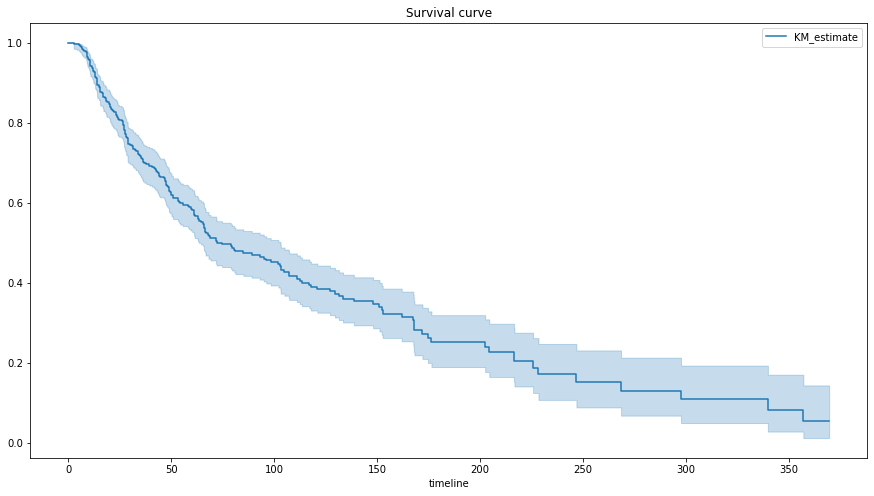

In [8]:
duration = [float(i) for i in data['OS_MONTHS'].tolist()]
T = data['OS_STATUS'].tolist()
observed = [False if int(T[i][0])== 0 else True for i in range(len(T))]
kmf.fit(duration, event_observed=observed).plot(figsize=(15, 8))
plt.title('Survival curve')

# Попробуем разделить пациентов по следующему признаку.
# В одну группу попадут пациенты:
- у которых проводилась адъювантная / послеоперационная фармацевтическая терапия, 
- которые начали адъювантную послеоперационную лучевую терапию.
# В другую попадают пациенты без таких терапий

Text(0.5, 1.0, 'Survival curve')

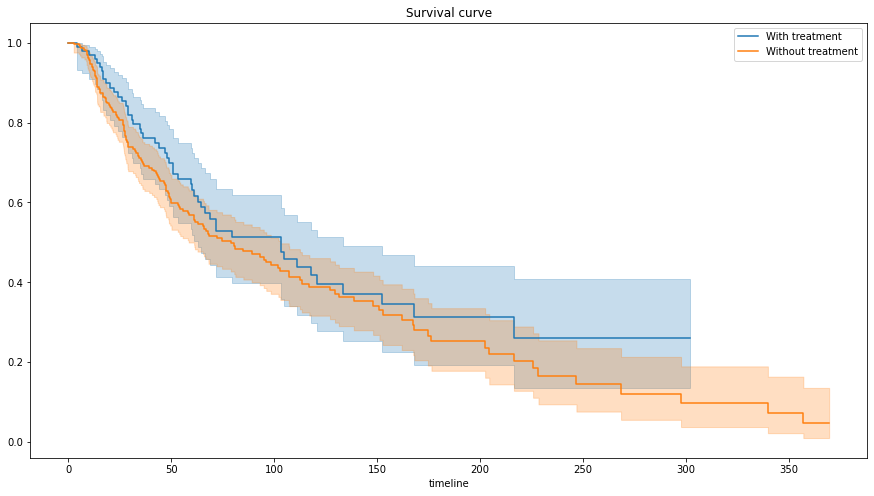

In [67]:
data_1 = data.loc[(data['RADIATION_TREATMENT_ADJUVANT'] == 'YES') | (data['PHARMACEUTICAL_TX_ADJUVANT'] == 'YES')]
data_2 = data.loc[(data['RADIATION_TREATMENT_ADJUVANT'] == 'NO') & (data['PHARMACEUTICAL_TX_ADJUVANT'] == 'NO')]

duration_treatment = [float(i) for i in data_1['OS_MONTHS'].tolist()]
T_1 = data_1['OS_STATUS'].tolist()
observed_treatment = [False if int(T_1[i][0])== 0 else True for i in range(len(T_1))]
kmf.fit(duration_treatment, event_observed=observed_treatment, label='With treatment').plot(figsize=(15, 8))

duration_without_treatment = [float(i) for i in data_2['OS_MONTHS'].tolist()]
T_2 = data_2['OS_STATUS'].tolist()
observed_without_treatment = [False if int(T_2[i][0])== 0 else True for i in range(len(T_2))]
kmf.fit(duration_without_treatment, event_observed=observed_without_treatment, label='Without treatment').plot(figsize=(15, 8))

plt.title('Survival curve')

In [68]:
results = logrank_test(duration_treatment, duration_without_treatment, event_observed_A=observed_treatment, event_observed_B=observed_without_treatment)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.42 0.23      2.10

## Из построенного графика и статистического теста можно сделать вывод, что выборку нельзя разделить по этому параметру на две группы (p-value>0.05)

## Рассмотрим еще несколько параметров, по которым наш набор данных можно разделить на две группы.
# SAMPLE_TYPE

In [9]:
data['SAMPLE_TYPE'].value_counts()

Metastasis    361
Primary       109
Name: SAMPLE_TYPE, dtype: int64

Text(0.5, 1.0, 'Survival curve')

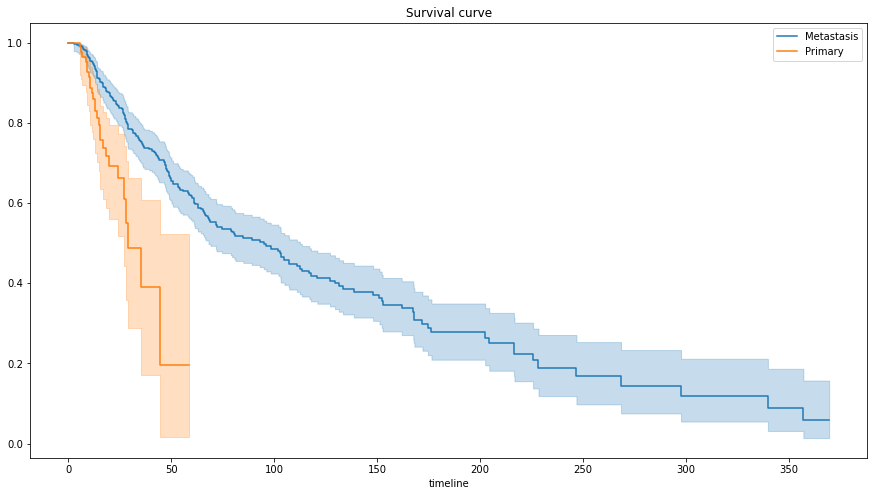

In [209]:
data_1 = data.loc[data['SAMPLE_TYPE'] == 'Metastasis']
data_2 = data.loc[data['SAMPLE_TYPE'] == 'Primary']

duration_Sample_Type_M_surv = [float(i) for i in data_1['OS_MONTHS'].tolist()]
T_1 = data_1['OS_STATUS'].tolist()
observed_Sample_Type_M_surv = [False if int(T_1[i][0])== 0 else True for i in range(len(T_1))]
kmf.fit(duration_Sample_Type_M_surv, event_observed=observed_Sample_Type_M_surv, label='Metastasis').plot(figsize=(15, 8))

duration_Sample_Type_P_surv = [float(i) for i in data_2['OS_MONTHS'].tolist()]
T_2 = data_2['OS_STATUS'].tolist()
observed_Sample_Type_P_surv = [False if int(T_2[i][0])== 0 else True for i in range(len(T_2))]
kmf.fit(duration_Sample_Type_P_surv, event_observed=observed_Sample_Type_P_surv, label='Primary').plot(figsize=(15, 8))

plt.title('Survival curve')


In [11]:
results = logrank_test(duration_Sample_Type_M, duration_Sample_Type_P, event_observed_A=observed_Sample_Type_M, event_observed_B=observed_Sample_Type_P)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          24.52 <0.005     20.37

### Мы сравнили распределения выживаемости двух групп, используя статистический метод лог-ранговый тест. Результаты показывают статистику, равную 24.52 и значение p <0,005 (ниже уровня 0,05). Что указывает на статистическую значимость. Это говорит о том, что функции выживаемость различны для этих двух групп.

# Аналогично, кривой выживаемости давайте построим кривую выздоровления. По оси y будем откладывать вероятность не вылечиться за n дней.

Text(0.5, 1.0, 'Recovery curve')

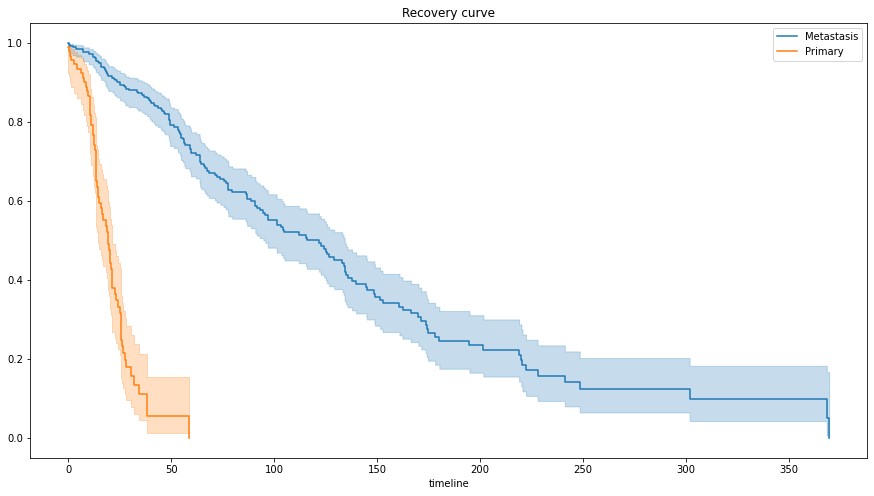

In [210]:
data_1 = data.loc[data['SAMPLE_TYPE'] == 'Metastasis']
data_2 = data.loc[data['SAMPLE_TYPE'] == 'Primary']

duration_Sample_Type_M = [float(i) for i in data_1['OS_MONTHS'].tolist()]
T_1 = data_1['OS_STATUS'].tolist()
observed_Sample_Type_M = [False if int(T_1[i][0])== 1 else True for i in range(len(T_1))]
kmf.fit(duration_Sample_Type_M, event_observed=observed_Sample_Type_M, label='Metastasis').plot(figsize=(15, 8))

duration_Sample_Type_P = [float(i) for i in data_2['OS_MONTHS'].tolist()]
T_2 = data_2['OS_STATUS'].tolist()
observed_Sample_Type_P = [False if int(T_2[i][0])== 1 else True for i in range(len(T_2))]
kmf.fit(duration_Sample_Type_P, event_observed=observed_Sample_Type_P, label='Primary').plot(figsize=(15, 8))

plt.title('Recovery curve')

# Нанесем обе кривые на один график и сравним вероятности

<AxesSubplot:xlabel='timeline'>

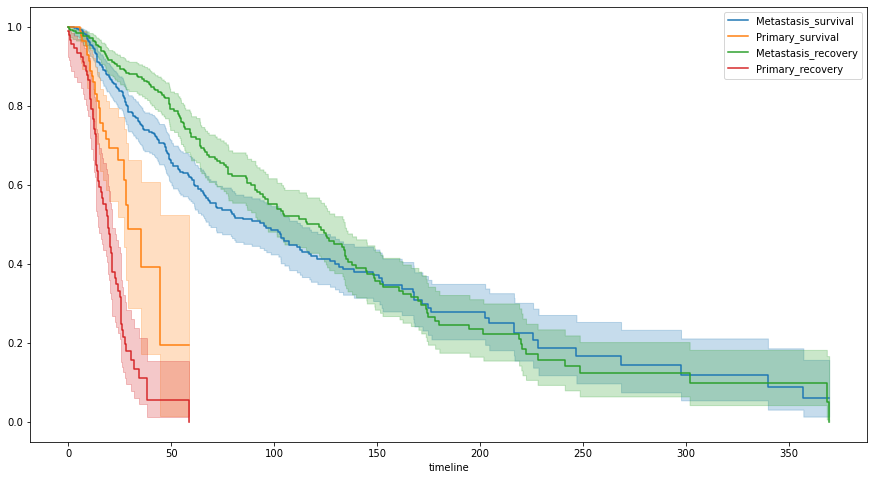

In [90]:
kmf.fit(duration_Sample_Type_M_surv, event_observed=observed_Sample_Type_M_surv, label='Metastasis_survival').plot(figsize=(15, 8))
kmf.fit(duration_Sample_Type_P_surv, event_observed=observed_Sample_Type_P_surv, label='Primary_survival').plot(figsize=(15, 8))

kmf.fit(duration_Sample_Type_M, event_observed=observed_Sample_Type_M, label='Metastasis_recovery').plot(figsize=(15, 8))
kmf.fit(duration_Sample_Type_P, event_observed=observed_Sample_Type_P, label='Primary_recovery').plot(figsize=(15, 8))


### Для основной опухоли развитие событий происходит быстрее.
### Для типа образца Metastasis вероятность выживания и вероятность не вылечиться за n дней одинаковая. Для типа образца Primary вероятность выживания выше, чем вероятность не вылечиться.

# Давайте построим аналогичную кривую для прогрессии рака, для этого используем параметры dfs_status и dfs_months

In [211]:
data_dfs['DFS_STATUS']

0      1:Recurred/Progressed
1      1:Recurred/Progressed
2      1:Recurred/Progressed
6              0:DiseaseFree
7              0:DiseaseFree
               ...          
470            0:DiseaseFree
471            0:DiseaseFree
476            0:DiseaseFree
477    1:Recurred/Progressed
478            0:DiseaseFree
Name: DFS_STATUS, Length: 378, dtype: object

Text(0.5, 1.0, 'Progression')

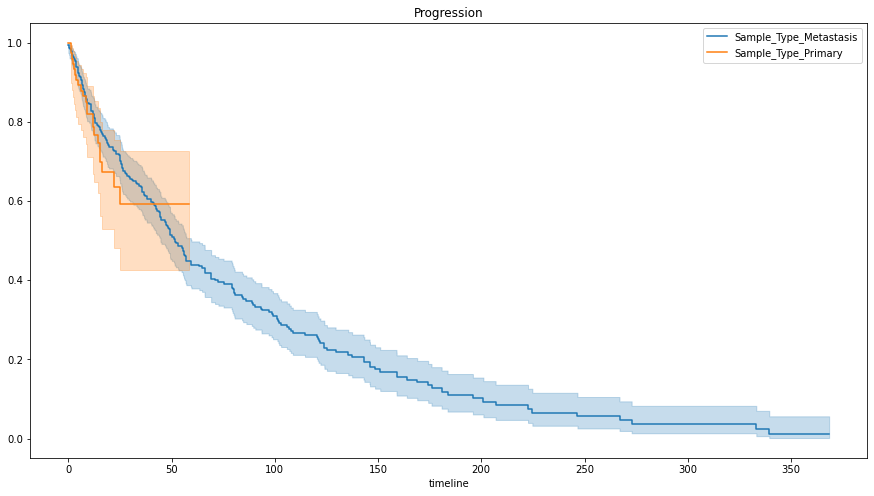

In [94]:
data_dfs = data.loc[data['DFS_MONTHS'] != '[Not Available]']

data_1 = data_dfs.loc[data_dfs['SAMPLE_TYPE'] == 'Metastasis']
data_2 = data_dfs.loc[data_dfs['SAMPLE_TYPE'] == 'Primary']

duration_Sample_Type_M = [float(i) for i in data_1['DFS_MONTHS'].tolist()]
T_1 = data_1['DFS_STATUS'].tolist()
observed_Sample_Type_M = [False if int(T_1[i][0])== 0 else True for i in range(len(T_1))]
kmf.fit(duration_Sample_Type_M, event_observed=observed_Sample_Type_M, label='Metastasis').plot(figsize=(15, 8))

duration_Sample_Type_P = [float(i) for i in data_2['DFS_MONTHS'].tolist()]
T_2 = data_2['DFS_STATUS'].tolist()
observed_Sample_Type_P = [False if int(T_2[i][0])== 0 else True for i in range(len(T_2))]
kmf.fit(duration_Sample_Type_P, event_observed=observed_Sample_Type_P, label='Primary').plot(figsize=(15, 8))

plt.title('Progression')

# Параметр TUMOR_STATUS

In [12]:
data['TUMOR_STATUS'].value_counts()

TUMOR FREE         222
WITH TUMOR         220
[Not Available]     27
[Discrepancy]        1
Name: TUMOR_STATUS, dtype: int64

Text(0.5, 1.0, 'Survival curve')

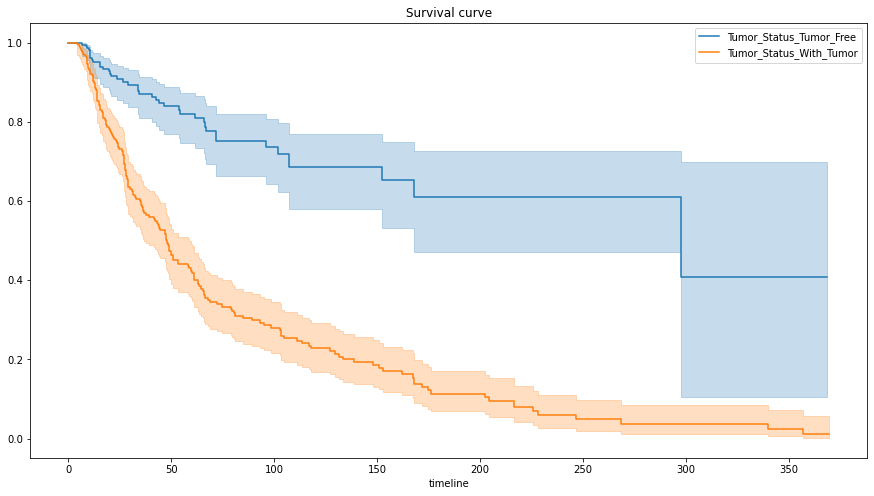

In [14]:
data_1 = data.loc[data['TUMOR_STATUS'] == 'TUMOR FREE']
data_2 = data.loc[data['TUMOR_STATUS'] == 'WITH TUMOR']

duration_Tumor_Status_Free = [float(i) for i in data_1['OS_MONTHS'].tolist()]
T_1 = data_1['OS_STATUS'].tolist()
observed_Tumor_Status_Free = [False if int(T_1[i][0])== 0 else True for i in range(len(T_1))]
kmf.fit(duration_Tumor_Status_Free, event_observed=observed_Tumor_Status_Free, label='Tumor_Status_Tumor_Free').plot(figsize=(15, 8))

duration_Tumor_Status_With = [float(i) for i in data_2['OS_MONTHS'].tolist()]
T_2 = data_2['OS_STATUS'].tolist()
observed_Tumor_Status_With = [False if int(T_2[i][0])== 0 else True for i in range(len(T_2))]
kmf.fit(duration_Tumor_Status_With, event_observed=observed_Tumor_Status_With, label='Tumor_Status_With_Tumor').plot(figsize=(15, 8))

plt.title('Survival curve')

In [15]:
results = logrank_test(duration_Tumor_Status_Free, duration_Tumor_Status_With, event_observed_A=observed_Tumor_Status_Free, event_observed_B=observed_Tumor_Status_With)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          76.63 <0.005     58.75

### На кривой Tumor_Free к концу появляются длинные горизонтальные участки, следовательно, там уже остается слишком мало пациентов, и смерть каждого из них дает очень большой вклад. По этому параметру нельзя сделать каких-то значимых выводов, хотя выборку и можно формально разделить по этому параметру.

# Рассмотрим еще некоторые параметры - CLARK_LEVEL_AT_DIAGNOSIS

In [16]:
merged_data['CLARK_LEVEL_AT_DIAGNOSIS'].value_counts()

IV                 168
[Not Available]    153
III                 78
V                   56
II                  18
I                    6
Name: CLARK_LEVEL_AT_DIAGNOSIS, dtype: int64

## Попробуем объединить значения этого параметры в группы

Text(0.5, 1.0, 'Survival curve')

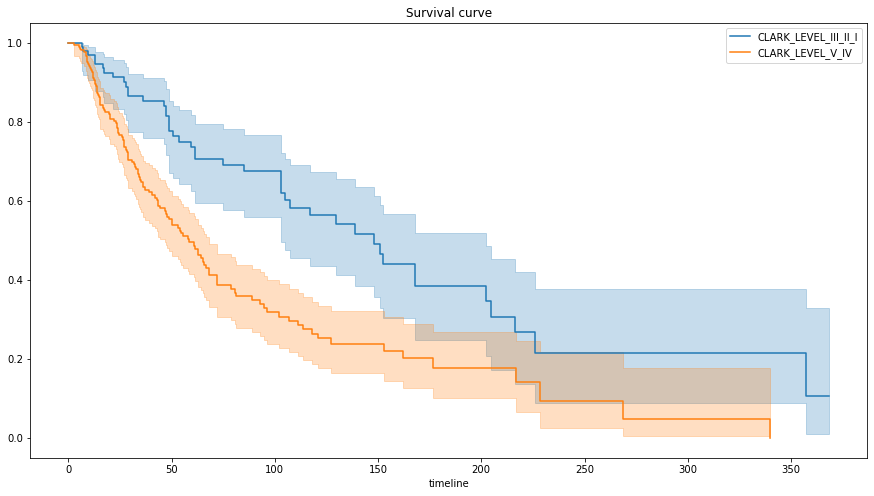

In [104]:
data_1 = data.loc[(data['CLARK_LEVEL_AT_DIAGNOSIS'] == 'III') | (data['CLARK_LEVEL_AT_DIAGNOSIS'] == 'II') | (data['CLARK_LEVEL_AT_DIAGNOSIS'] == 'I')]
data_2 = data.loc[(data['CLARK_LEVEL_AT_DIAGNOSIS'] == 'V') | (data['CLARK_LEVEL_AT_DIAGNOSIS'] == 'IV')]

duration_CLARK_LEVEL_3 = [float(i) for i in data_1['OS_MONTHS'].tolist()]
T_1 = data_1['OS_STATUS'].tolist()
observed_CLARK_LEVEL_3 = [False if int(T_1[i][0])== 0 else True for i in range(len(T_1))]
kmf.fit(duration_CLARK_LEVEL_3, event_observed=observed_CLARK_LEVEL_3, label='CLARK_LEVEL_III_II_I').plot(figsize=(15, 8))

duration_CLARK_LEVEL_5 = [float(i) for i in data_2['OS_MONTHS'].tolist()] 
T_2 = data_2['OS_STATUS'].tolist()
observed_CLARK_LEVEL_5 = [False if int(T_2[i][0])== 0 else True for i in range(len(T_2))]
kmf.fit(duration_CLARK_LEVEL_5, event_observed=observed_CLARK_LEVEL_5, label='CLARK_LEVEL_V_IV').plot(figsize=(15, 8))

plt.title('Survival curve')

In [105]:
results = logrank_test(duration_CLARK_LEVEL_3, duration_CLARK_LEVEL_5,event_observed_A=observed_CLARK_LEVEL_3, event_observed_B=observed_CLARK_LEVEL_5)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          19.40 <0.005     16.52

## При таком разбиении на группы результаты показывают статистику, равную 19.40 и значение p <0,005 (ниже уровня 0,01). Что указывает на статистическую значимость. Это говорит о том, что функции выживаемость различны для этих двух групп.

# Для последнего разделения на группы попробуем исключим из выборки пациентов:
### 1) у которых проводилась адъювантная / послеоперационная фармацевтическая терапия, 
### 2) которые начали адъювантную послеоперационную лучевую терапию.
# И посмотрим изменится ли результат.

Text(0.5, 1.0, 'Survival curve')

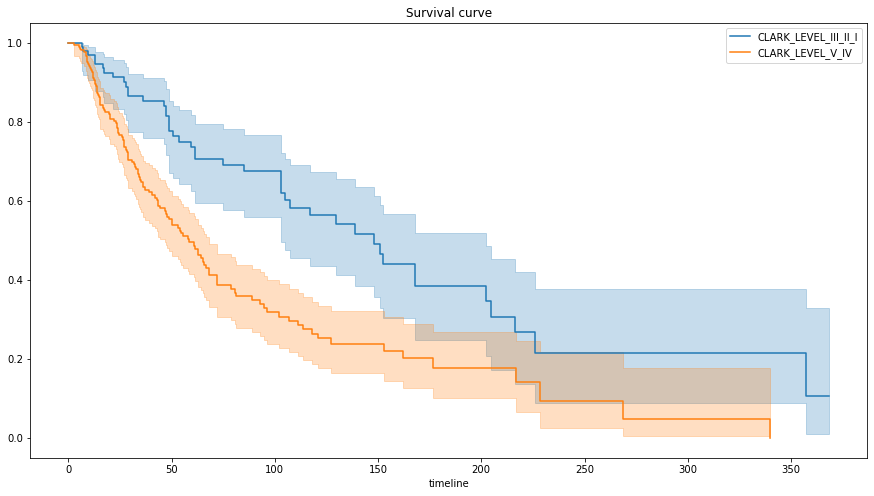

In [111]:
data_new = data.loc[(data['RADIATION_TREATMENT_ADJUVANT'] != 'Yes') | (data['PHARMACEUTICAL_TX_ADJUVANT'] != 'Yes')]

data_1 = data_new.loc[(data_new['CLARK_LEVEL_AT_DIAGNOSIS'] == 'III') | (data_new['CLARK_LEVEL_AT_DIAGNOSIS'] == 'II') | (data_new['CLARK_LEVEL_AT_DIAGNOSIS'] == 'I')]
data_2 = data_new.loc[(data_new['CLARK_LEVEL_AT_DIAGNOSIS'] == 'V') | (data_new['CLARK_LEVEL_AT_DIAGNOSIS'] == 'IV')]

duration_CLARK_LEVEL_3 = [float(i) for i in data_1['OS_MONTHS'].tolist()]
T_1 = data_1['OS_STATUS'].tolist()
observed_CLARK_LEVEL_3 = [False if int(T_1[i][0])== 0 else True for i in range(len(T_1))]
kmf.fit(duration_CLARK_LEVEL_3, event_observed=observed_CLARK_LEVEL_3, label='CLARK_LEVEL_III_II_I').plot(figsize=(15, 8))

duration_CLARK_LEVEL_5 = [float(i) for i in data_2['OS_MONTHS'].tolist()] 
T_2 = data_2['OS_STATUS'].tolist()
observed_CLARK_LEVEL_5 = [False if int(T_2[i][0])== 0 else True for i in range(len(T_2))]
kmf.fit(duration_CLARK_LEVEL_5, event_observed=observed_CLARK_LEVEL_5, label='CLARK_LEVEL_V_IV').plot(figsize=(15, 8))

plt.title('Survival curve')

In [112]:
results = logrank_test(duration_CLARK_LEVEL_3, duration_CLARK_LEVEL_5, event_observed_A=observed_CLARK_LEVEL_3, event_observed_B=observed_CLARK_LEVEL_5)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          19.40 <0.005     16.52

### Мы видим, что исключение из выборки пациентов, которые проходили лечение не поменяло статистические тесты. Отсюда можно сделать вывод, что пациенты не отличаются по наличию/отсутствию лечения

# Посчитаем количество клеток, инфильтрирующих опухоль, с помощью пакета MCPcounter для каждого образца.
# Эта часть задания была выполнена на R 
# Исходный код можно посмотреть в файле infiltrating_cell.R

In [208]:
data_RNA = pd.read_csv('data_RNA_Seq_v2_expression_median.txt', sep='\t', header = 0, index_col=0)
data_RNA = data_RNA.dropna(how='any')
data_RNA = data_RNA.astype(float)
# При написании кода на R возникли ошибки с уникальностью id генов, здесь я смотрела какие гены имели одинаковые id и думала как это можно исправить)
pd.concat(g for _, g in data_RNA.groupby("Entrez_Gene_Id") if len(g) > 1)

,Entrez_Gene_Id,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,TCGA-BF-A3DJ-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
SEPTIN4,5414.0,1.6155,0.4015,1.4184,0.3247,3.2875,0.6952,1.5278,1.0561,2.0679,...,1.3774,4.7681,1.3482,8.5152,0.5522,3.7178,0.5328,2.7132,4.3200,0.0000
SEPT4,5414.0,735.8643,148.1481,353.1915,579.5455,103.1082,284.3239,569.8572,43.6511,291.2287,...,1646.0055,280.4508,58.3100,601.3837,1663.1695,1363.4136,118.8066,1537.9845,184.6065,1612.5552
NEBL,10529.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NEBL,10529.0,9.2892,88.3268,2173.0496,12.9870,6.8739,449.7741,7.9444,60.9003,85.1284,...,1.3774,0.4335,110.5530,39.3827,53.0094,12.5053,3.1966,17.4419,13.2479,4.5774
LCOR,84458.0,39.4750,37.4345,54.1560,26.7825,69.3634,46.7814,55.8735,40.2751,32.6934,...,23.4160,57.5943,62.8231,51.8999,59.0889,56.3245,44.9920,97.0814,32.6791,35.9653
C10orf12,84458.0,13.4330,36.4388,25.9858,9.2565,90.2301,15.0886,30.2926,79.7653,28.3095,...,4.1322,21.2961,54.8080,36.4449,29.8123,84.2755,46.1108,96.7171,56.8882,5.8852
NKAIN3,286183.0,1.2116,11.2416,102.8369,81.4935,5.0807,0.0000,4.2777,21.4735,9.9948,...,1.3774,201.9939,8.4263,9.5796,7.7305,0.6760,8.5242,0.7752,7.4879,0.0000
NKAIN3,286183.0,0.8078,0.0000,4.9645,6.8182,0.0000,0.0000,0.0000,0.3520,0.0000,...,0.0000,3.0342,0.0000,0.0000,0.0000,1.6899,0.5328,0.0000,0.0000,0.0000
CC2D2B,387707.0,1.2116,0.8030,0.0000,0.0000,0.0000,0.0000,0.3056,1.4081,0.0000,...,0.0000,0.0000,1.0112,0.0000,0.5522,1.0139,0.5328,2.3256,0.0000,1.3078


In [165]:
cells = pd.read_csv('infiltrating_cell', sep=' ')
cells.columns = cells.columns.str.replace("[.]", "-")
cells

<ipython-input-165-91714a1887aa>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cells.columns = cells.columns.str.replace("[.]", "-")


,Entrez_Gene_Id,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,TCGA-BF-A3DJ-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
T cells,47760.000000,30.930267,245.943317,151.063817,18.046542,338.588367,241.542100,32.439583,138.463050,65.023842,...,208.907250,42.334925,68.955192,61.424500,722.897125,92.803825,10.166950,133.462517,44.615633,466.459600
CD8 T cells,926.000000,1.211600,588.577700,170.922000,1.623400,2.689800,687.521700,24.138700,65.476600,24.470100,...,73.002800,6.068500,55.613600,48.962200,870.237400,51.373000,4.794900,81.782900,87.263300,391.041400
Cytotoxic lymphocytes,18180.333333,10.844783,429.941450,128.099300,70.941567,72.325167,470.984233,35.342367,79.764100,877.358267,...,96.648283,14.810017,71.310067,81.106983,486.304983,76.309833,39.069450,397.079467,72.973833,158.356500
B lineage,18077.250000,4.442662,90.585162,670.035475,10.024363,5.379562,191.996862,76.502950,44.311100,279.682912,...,240.185937,2.384050,133.093350,25.079838,52.457188,27.672162,9.722962,181.928300,27.143787,333.496825
NK cells,19833.875000,1.464050,15.557562,7.092212,0.771112,0.485675,34.761450,5.385388,5.368362,4.759163,...,0.344350,1.408762,11.206988,3.525825,10.077300,3.844537,1.265325,9.357537,4.823975,15.984962
Monocytic lineage,26173.571429,38.755486,788.861657,287.537986,43.320957,94.355729,648.949314,105.415943,380.035771,548.878671,...,392.561986,218.032086,548.335214,371.018014,608.740243,322.796043,171.702557,773.031029,290.933614,1298.395571
Myeloid dendritic cells,2877.400000,13.489500,357.723580,90.921980,5.454560,12.014360,136.531100,6.416620,90.751960,282.750300,...,12.947640,7.368900,69.837140,85.151660,57.095520,22.036320,17.155040,101.395340,63.935500,82.393320
Neutrophils,16362.071429,178.946457,172.122571,268.591693,326.275521,366.300921,199.587857,215.502471,140.860143,159.375686,...,190.279414,129.326900,192.721436,146.240407,220.123064,234.075686,323.768936,116.749721,222.478221,337.700543
Endothelial cells,57476.931034,138.056383,265.824941,388.383462,468.887138,96.522869,823.583003,145.654162,132.340769,216.083231,...,766.362693,459.725272,619.605797,570.314372,165.540097,224.218176,368.802010,297.135790,246.494141,1050.526238
Fibroblasts,8265.875000,7182.143587,5291.534188,5056.863487,11027.597412,5883.965950,29486.618025,3688.717450,5990.755850,4029.984487,...,13875.516550,3366.601663,16990.640912,37675.653937,4678.837663,8420.659063,1164.757587,6728.972875,1036.107712,10845.839463


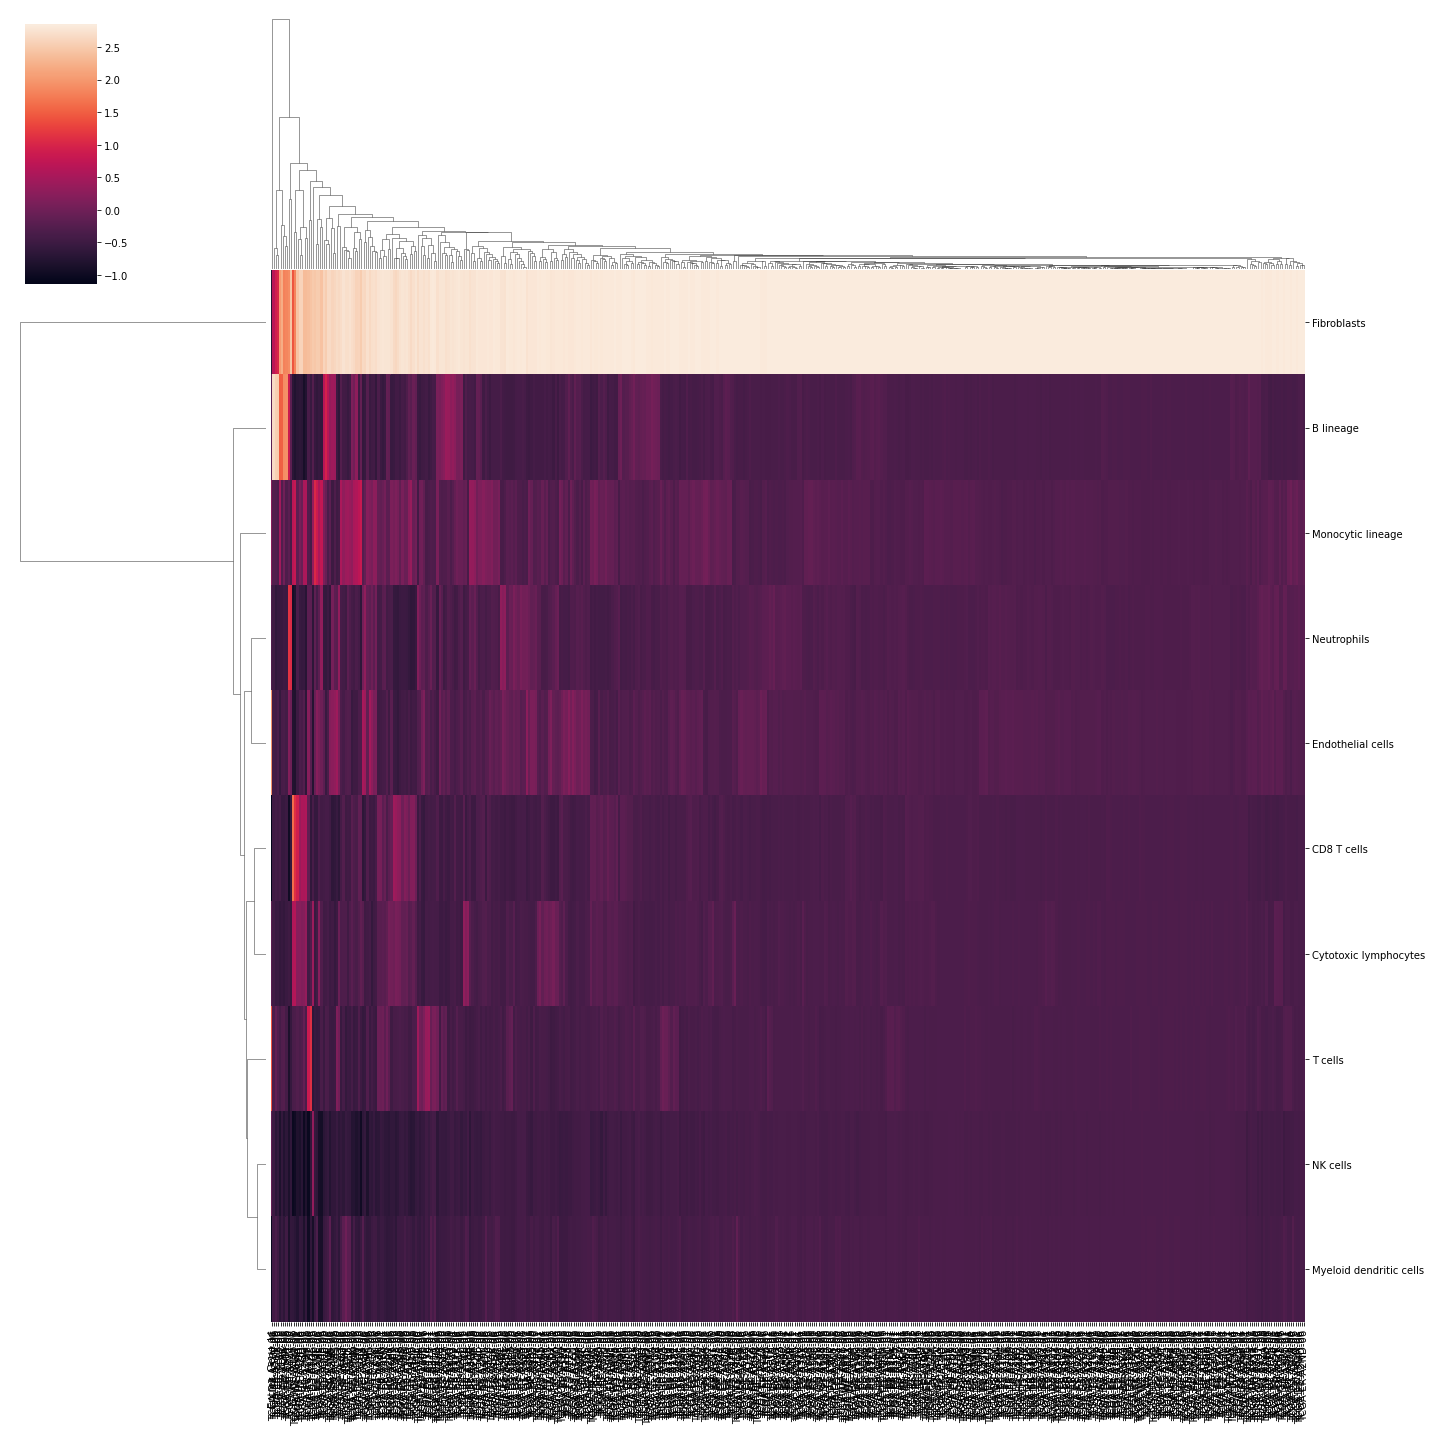

In [166]:
sns.clustermap(cells, z_score = 1, yticklabels=True, xticklabels=True, figsize=(20, 20))

### Объединим полученную таблицу с таблицей по пациентам и образцам

In [169]:
cells_Transpose = cells.transpose()
cells_Transpose['SAMPLE_ID'] = cells_Transpose.index
cells_Transpose.drop(['Entrez_Gene_Id'], axis=0)

,T cells,CD8 T cells,Cytotoxic lymphocytes,B lineage,NK cells,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,SAMPLE_ID
TCGA-3N-A9WB-06,30.930267,1.2116,10.844783,4.442662,1.464050,38.755486,13.48950,178.946457,138.056383,7182.143587,TCGA-3N-A9WB-06
TCGA-3N-A9WC-06,245.943317,588.5777,429.941450,90.585162,15.557562,788.861657,357.72358,172.122571,265.824941,5291.534188,TCGA-3N-A9WC-06
TCGA-3N-A9WD-06,151.063817,170.9220,128.099300,670.035475,7.092212,287.537986,90.92198,268.591693,388.383462,5056.863487,TCGA-3N-A9WD-06
TCGA-BF-A1PU-01,18.046542,1.6234,70.941567,10.024363,0.771112,43.320957,5.45456,326.275521,468.887138,11027.597412,TCGA-BF-A1PU-01
TCGA-BF-A1PV-01,338.588367,2.6898,72.325167,5.379562,0.485675,94.355729,12.01436,366.300921,96.522869,5883.965950,TCGA-BF-A1PV-01
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-YG-AA3O-06,92.803825,51.3730,76.309833,27.672162,3.844537,322.796043,22.03632,234.075686,224.218176,8420.659063,TCGA-YG-AA3O-06
TCGA-YG-AA3P-06,10.166950,4.7949,39.069450,9.722962,1.265325,171.702557,17.15504,323.768936,368.802010,1164.757587,TCGA-YG-AA3P-06
TCGA-Z2-A8RT-06,133.462517,81.7829,397.079467,181.928300,9.357537,773.031029,101.39534,116.749721,297.135790,6728.972875,TCGA-Z2-A8RT-06
TCGA-Z2-AA3S-06,44.615633,87.2633,72.973833,27.143787,4.823975,290.933614,63.93550,222.478221,246.494141,1036.107712,TCGA-Z2-AA3S-06


In [229]:
patients = pd.DataFrame(merged_data[['PATIENT_ID', 'SAMPLE_ID', 'OS_STATUS', 'OS_MONTHS', 'DFS_STATUS']])
patients.loc[patients['OS_STATUS'] == '1:DECEASED', 'OS_STATUS'] = 1
patients.loc[patients['OS_STATUS'] == '0:LIVING', "OS_STATUS"] = 0

In [233]:
patients = pd.DataFrame(merged_data[['PATIENT_ID', 'SAMPLE_ID', 'OS_STATUS', 'OS_MONTHS', 'DFS_STATUS']])
patients.loc[patients['OS_STATUS'] == '1:DECEASED', 'OS_STATUS'] = 1
patients.loc[patients['OS_STATUS'] == '0:LIVING', "OS_STATUS"] = 0
patients.loc[patients['DFS_STATUS'] == '1:Recurred/Progressed', 'DFS_STATUS'] = 1
patients.loc[patients['DFS_STATUS'] == '0:DiseaseFree', "DFS_STATUS"] = 0

cells_patients = cells_Transpose.merge(patients, left_on='SAMPLE_ID', right_on='SAMPLE_ID', how='inner')
cells_patients

,T cells,CD8 T cells,Cytotoxic lymphocytes,B lineage,NK cells,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts,SAMPLE_ID,PATIENT_ID,OS_STATUS,OS_MONTHS,DFS_STATUS
0,30.930267,1.2116,10.844783,4.442662,1.464050,38.755486,13.48950,178.946457,138.056383,7182.143587,TCGA-3N-A9WB-06,TCGA-3N-A9WB,1,17.02,1
1,245.943317,588.5777,429.941450,90.585162,15.557562,788.861657,357.72358,172.122571,265.824941,5291.534188,TCGA-3N-A9WC-06,TCGA-3N-A9WC,0,66.43,1
2,151.063817,170.9220,128.099300,670.035475,7.092212,287.537986,90.92198,268.591693,388.383462,5056.863487,TCGA-3N-A9WD-06,TCGA-3N-A9WD,1,12.98,1
3,18.046542,1.6234,70.941567,10.024363,0.771112,43.320957,5.45456,326.275521,468.887138,11027.597412,TCGA-BF-A1PU-01,TCGA-BF-A1PU,0,12.71,1
4,338.588367,2.6898,72.325167,5.379562,0.485675,94.355729,12.01436,366.300921,96.522869,5883.965950,TCGA-BF-A1PV-01,TCGA-BF-A1PV,0,0.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,92.803825,51.3730,76.309833,27.672162,3.844537,322.796043,22.03632,234.075686,224.218176,8420.659063,TCGA-YG-AA3O-06,TCGA-YG-AA3O,1,37.91,1
468,10.166950,4.7949,39.069450,9.722962,1.265325,171.702557,17.15504,323.768936,368.802010,1164.757587,TCGA-YG-AA3P-06,TCGA-YG-AA3P,0,14.42,0
469,133.462517,81.7829,397.079467,181.928300,9.357537,773.031029,101.39534,116.749721,297.135790,6728.972875,TCGA-Z2-A8RT-06,TCGA-Z2-A8RT,0,27.56,0
470,44.615633,87.2633,72.973833,27.143787,4.823975,290.933614,63.93550,222.478221,246.494141,1036.107712,TCGA-Z2-AA3S-06,TCGA-Z2-AA3S,0,96.91,1


### С помощью scipy.stats.spearmanr() найдем коэффициенты корреляции для всех типов клеток

In [234]:
nams = cells_patients.columns.tolist()[:-5]
correlations = [[i, scipy.stats.spearmanr(cells_patients[i], cells_patients['OS_STATUS'])] for i in nams]
correlations

[['T cells',
  SpearmanrResult(correlation=-0.182970694542492, pvalue=6.377092426841633e-05)],
 ['CD8 T cells',
  SpearmanrResult(correlation=-0.20051752280924384, pvalue=1.136306457756055e-05)],
 ['Cytotoxic lymphocytes',
  SpearmanrResult(correlation=-0.1555998231158667, pvalue=0.0006933052551051898)],
 ['B lineage',
  SpearmanrResult(correlation=-0.10032872324981439, pvalue=0.02930049377268819)],
 ['NK cells',
  SpearmanrResult(correlation=-0.1973878884793834, pvalue=1.5633886938585707e-05)],
 ['Monocytic lineage',
  SpearmanrResult(correlation=-0.09503515312179811, pvalue=0.039028083629736546)],
 ['Myeloid dendritic cells',
  SpearmanrResult(correlation=-0.11088472485803508, pvalue=0.015948956699181012)],
 ['Neutrophils',
  SpearmanrResult(correlation=0.037490931965479986, pvalue=0.4164259001513294)],
 ['Endothelial cells',
  SpearmanrResult(correlation=0.1260492463424111, pvalue=0.006103392170987164)],
 ['Fibroblasts',
  SpearmanrResult(correlation=0.08033771135459997, pvalue=0.08

### Попробуем применить метод поправки Бонферрони для решения проблемы множественных сравнений

In [207]:
alpha = 0.05
m = len(nams)
level = alpha/m
result = [correlations[i] for i in range(m) if level>correlations[i][1][1]]
result

[['T cells',
  SpearmanrResult(correlation=-0.182970694542492, pvalue=6.377092426841633e-05)],
 ['CD8 T cells',
  SpearmanrResult(correlation=-0.20051752280924384, pvalue=1.136306457756055e-05)],
 ['Cytotoxic lymphocytes',
  SpearmanrResult(correlation=-0.1555998231158667, pvalue=0.0006933052551051898)],
 ['NK cells',
  SpearmanrResult(correlation=-0.1973878884793834, pvalue=1.5633886938585707e-05)]]

### Отсюда видно, что выживаемость коррелирует со следующими типами клеток:
- T-cells
- CD8 T-cells
- Cytotoxic lymphocytes
- NK cells

### CD8 + цитотоксические Т-лимфоциты являются преимущественными иммунными клетками для борьбы с раком. Т-клетки могут сначала находить раковые клетки, и их также можно стимулировать для уничтожения раковых клеток. NK-клетки представляют собой специализированную популяцию иммунных эффекторных клеток, обладающих быстродействующими и мощными противоопухолевыми свойствами.

### Посмотрим, коррелирует ли количество клеток с параметром OS_MONTHS, при этом анализ будем проводить для двух групп: OS_STATUS = 0:LIVING и OS_STATUS = 1:DECEASED

In [235]:
cells_patients_liv = cells_patients.loc[cells_patients['OS_STATUS'] == 1]
correlations = [[i, scipy.stats.spearmanr(cells_patients_liv[i], cells_patients_liv['OS_MONTHS'])] for i in nams]
correlations

[['T cells',
  SpearmanrResult(correlation=-0.050241966266371244, pvalue=0.4543283080422408)],
 ['CD8 T cells',
  SpearmanrResult(correlation=0.0819296249773498, pvalue=0.22193291712829807)],
 ['Cytotoxic lymphocytes',
  SpearmanrResult(correlation=0.11662427029795525, pvalue=0.08156886058327195)],
 ['B lineage',
  SpearmanrResult(correlation=0.03487463931957577, pvalue=0.6036257572774516)],
 ['NK cells',
  SpearmanrResult(correlation=0.026579186897347777, pvalue=0.6923668130309217)],
 ['Monocytic lineage',
  SpearmanrResult(correlation=0.10250774745858496, pvalue=0.1261048078560384)],
 ['Myeloid dendritic cells',
  SpearmanrResult(correlation=0.1383817488307002, pvalue=0.038500305265707316)],
 ['Neutrophils',
  SpearmanrResult(correlation=-0.10774745822016342, pvalue=0.10777395372515697)],
 ['Endothelial cells',
  SpearmanrResult(correlation=0.08132682395615123, pvalue=0.22536392306606204)],
 ['Fibroblasts',
  SpearmanrResult(correlation=0.0364041116916514, pvalue=0.5878334719268921)]

In [236]:
cells_patients_liv = cells_patients.loc[cells_patients['OS_STATUS'] == 0]
correlations = [[i, scipy.stats.spearmanr(cells_patients_liv[i], cells_patients_liv['OS_MONTHS'])] for i in nams]
correlations

[['T cells',
  SpearmanrResult(correlation=0.003446374089015712, pvalue=0.9569355461088572)],
 ['CD8 T cells',
  SpearmanrResult(correlation=0.1449130440014525, pvalue=0.02245243021889877)],
 ['Cytotoxic lymphocytes',
  SpearmanrResult(correlation=0.08118588942349513, pvalue=0.2026060670357074)],
 ['B lineage',
  SpearmanrResult(correlation=0.038511981473430795, pvalue=0.5460781696483117)],
 ['NK cells',
  SpearmanrResult(correlation=0.07419519042384916, pvalue=0.24437161525642426)],
 ['Monocytic lineage',
  SpearmanrResult(correlation=0.08731509324508555, pvalue=0.17046476564956753)],
 ['Myeloid dendritic cells',
  SpearmanrResult(correlation=0.15884082874734348, pvalue=0.012255096358142935)],
 ['Neutrophils',
  SpearmanrResult(correlation=-0.07630880393603742, pvalue=0.23115543814488507)],
 ['Endothelial cells',
  SpearmanrResult(correlation=-0.10213202355405322, pvalue=0.10861504910477413)],
 ['Fibroblasts',
  SpearmanrResult(correlation=-0.2251417336765725, pvalue=0.000352089539078

### Корреляция есть только в группе 0:LIVING с фибробластами (т.к. p-value = 0.00035 < level = 0.005). Фибробласты играют важную роль в прогрессировании, росте и распространении рака. Они являются ключевым фактором злокачественного прогрессирования рака и представляют собой важную мишень для лечения. 

### Проверим, есть ли корреляция с прогрессией рака

In [238]:
correlations = [[i, scipy.stats.spearmanr(cells_patients_liv[i], cells_patients_liv['DFS_STATUS'])] for i in nams]
correlations

[['T cells',
  SpearmanrResult(correlation=-0.04988519817271655, pvalue=0.4341492709446819)],
 ['CD8 T cells',
  SpearmanrResult(correlation=0.08053067195454867, pvalue=0.20628568975243328)],
 ['Cytotoxic lymphocytes',
  SpearmanrResult(correlation=0.0448160325385375, pvalue=0.4823355340501698)],
 ['B lineage',
  SpearmanrResult(correlation=0.04976998986284885, pvalue=0.43521277353306287)],
 ['NK cells',
  SpearmanrResult(correlation=0.07983935873832003, pvalue=0.2102200581354523)],
 ['Monocytic lineage',
  SpearmanrResult(correlation=0.1058764367684215, pvalue=0.09619251967009262)],
 ['Myeloid dendritic cells',
  SpearmanrResult(correlation=0.07016186070943276, pvalue=0.2710337724431175)],
 ['Neutrophils',
  SpearmanrResult(correlation=-0.027765202678117065, pvalue=0.6634740498653297)],
 ['Endothelial cells',
  SpearmanrResult(correlation=0.0998856046553008, pvalue=0.11665272775101729)],
 ['Fibroblasts',
  SpearmanrResult(correlation=-0.00691249859206234, pvalue=0.9137502081513325)]]

### Из значений p-value видно, что корреляции между прогрессией и количеством различных типов клеток нет.